# WeatherPy
----

### Analysis
* Weather is warmer near the equator. There is a stronger relationship in the northern hemisphere than the southern.
* Most cities have humidity over 60%, with a large number near 100%.
* There is no relationship between latitude and cloudiness, however there are very strong bands at 0, 20, 75 and 90 percents.
* Wind speed is not related to latitude, most cities have wind speeds below 10 mph.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



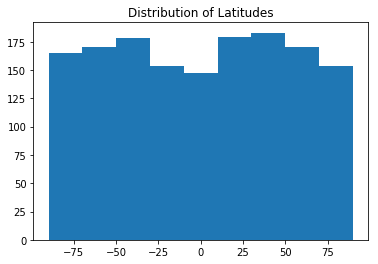

In [4]:
#Histogram to check equal distribution of latitudes
plt.hist(lats, bins=[-90,-70,-50,-30,-10,10,30,50,70,90])
plt.title("Distribution of Latitudes")
plt.savefig("Resources/latitude_histogram.png")
plt.show()

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
#Split city list into groups of 60 (API limit 60 requests/min)
#Make timer so that api calls are delayed by one minute between groups

In [7]:
#city API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#set city number/index for data frame and tracking
city_num = 0

#empty city dataframe
cities_df=pd.DataFrame(columns=["City","Date","Cloudiness","Temperature","Humidity","Wind speed","Latitude","Longitude"])
cities_df.head()

,City,Date,Cloudiness,Temperature,Humidity,Wind speed,Latitude,Longitude


In [8]:
#loop through city list
for city in cities:
    #make url with city name
    query_url = f"{base_url}{city}&APPID={api_key}&units=imperial"
    #make api request
    res = requests.get(query_url)
    #convert to json
    res = res.json()
    try:
        #add info to dataframe
        #data to gather:city name, date, cloudiness, temp, humidity, wind speed, lat, lng
        cities_df.loc[city_num,"City"] = res["name"]
        cities_df.loc[city_num,"Date"] = res['dt']
        cities_df.loc[city_num,"Cloudiness"] = res['clouds']['all']
        cities_df.loc[city_num,"Temperature"] = res["main"]["temp"]
        cities_df.loc[city_num,"Humidity"] = res["main"]["humidity"]
        cities_df.loc[city_num,"Wind speed"] = res['wind']['speed']
        cities_df.loc[city_num,"Latitude"] = res['coord']['lat']
        cities_df.loc[city_num,"Longitude"] = res['coord']['lon']
        print(f"Processing request {city_num} {city}")
        
        #add to city count/index
        city_num = city_num +1
            
        #check for time delay using remainder, delay on 60 sec intervals
        if np.mod(city_num,60) == 0:
            print("-------------")
            print("Search Paused")
            print("-------------")
            time.sleep(60)
            
    #if city not found
    except KeyError:
        print(f"Error {city} not found")
        
print("--------------")
print("Done Searching")
print("--------------")
            




Processing request 0 maldonado
Processing request 1 victoria
Processing request 2 hilo
Error ozgon not found
Processing request 3 rikitea
Error kushmurun not found
Processing request 4 bambous virieux
Processing request 5 ibra
Processing request 6 busselton
Processing request 7 ushuaia
Processing request 8 narsaq
Error taolanaro not found
Error louisbourg not found
Processing request 9 penon blanco
Processing request 10 sagua de tanamo
Processing request 11 lebu
Processing request 12 punta arenas
Processing request 13 makakilo city
Processing request 14 albany
Processing request 15 develi
Processing request 16 hambantota
Error marcona not found
Processing request 17 matara
Processing request 18 parakai
Processing request 19 chokurdakh
Processing request 20 east london
Processing request 21 puerto ayora
Processing request 22 bluff
Processing request 23 ilulissat
Processing request 24 hithadhoo
Processing request 25 isangel
Processing request 26 arlit
Processing request 27 kapaa
Processi

Processing request 233 khatanga
Processing request 234 kununurra
Processing request 235 santa lucia
Processing request 236 gongzhuling
Processing request 237 kaitangata
Processing request 238 tuatapere
Processing request 239 tromso
-------------
Search Paused
-------------
Processing request 240 vila velha
Error attawapiskat not found
Error wulanhaote not found
Processing request 241 arenal
Processing request 242 avera
Error asau not found
Processing request 243 banda aceh
Processing request 244 doha
Processing request 245 vao
Processing request 246 rudnogorsk
Processing request 247 carnarvon
Processing request 248 vanimo
Processing request 249 arraial do cabo
Processing request 250 leningradskiy
Processing request 251 kungurtug
Processing request 252 tecoanapa
Processing request 253 saint george
Processing request 254 henties bay
Processing request 255 sirajganj
Processing request 256 manaure
Processing request 257 dzhebariki-khaya
Processing request 258 san nicolas
Processing request

Processing request 459 pitimbu
Processing request 460 xuanhua
Processing request 461 krasnyye tkachi
Processing request 462 okhotsk
Processing request 463 alyangula
Processing request 464 gornopravdinsk
Processing request 465 garwolin
Processing request 466 vermillion
Processing request 467 maua
Processing request 468 kinshasa
Error solovetskiy not found
Processing request 469 washington
Error warqla not found
Processing request 470 sao joao da barra
Processing request 471 fagersta
Processing request 472 takaungu
Processing request 473 nanortalik
Processing request 474 iwade
Processing request 475 kalengwa
Processing request 476 pasighat
Processing request 477 shache
Processing request 478 hammerfest
Processing request 479 makaha
-------------
Search Paused
-------------
Processing request 480 freeport
Processing request 481 mansfield
Processing request 482 hay river
Processing request 483 iberia
Processing request 484 comodoro rivadavia
Processing request 485 wellington
Processing req

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#check cities list
cities_df.head()

,City,Date,Cloudiness,Temperature,Humidity,Wind speed,Latitude,Longitude
0,Maldonado,1571261113,75,60.8,82,13.87,-34.91,-54.96
1,Victoria,1571261113,75,77,94,7.74,5.28,115.24
2,Hilo,1571261113,20,75.47,54,6.93,19.71,-155.08
3,Rikitea,1571261114,100,73.94,76,3.73,-23.12,-134.97
4,Bambous Virieux,1571261114,75,68.76,88,14.99,-20.34,57.76


In [10]:
#Make output data file
cities_df.to_csv(output_data_file, encoding = "utf-8")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

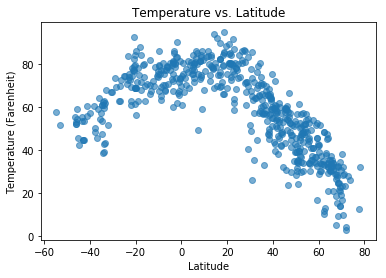

In [11]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Temperature"], alpha=.6)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")

#save figure
plt.savefig("Resources/Latitude_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

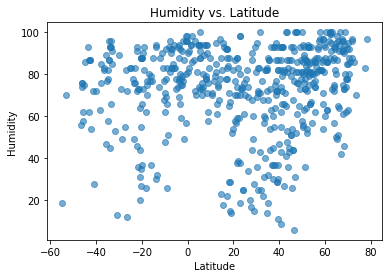

In [13]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], alpha=.6)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#save the figure
plt.savefig("Resources/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

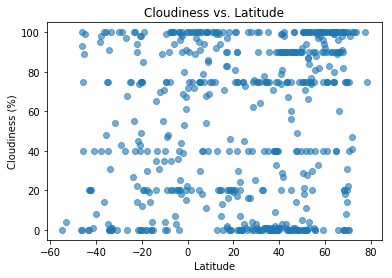

In [14]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], alpha=.6)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the figure
plt.savefig("Resources/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

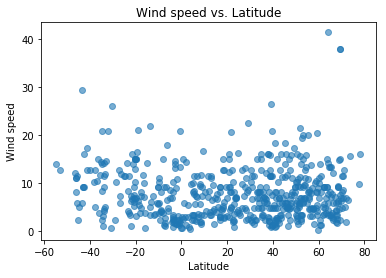

In [15]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Wind speed"], alpha=.6)
plt.title("Wind speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")

#save the figure
plt.savefig("Resources/Latitude_vs_Wind_speed.png")
plt.show()